In [18]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

* make_blobs: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [19]:
n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation

def generate_data(n_samples, n_features):
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])
    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

* numpy.hstack: https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html

In [24]:
X, y = generate_data(10, 5)

import pandas as pd
pd.set_option('precision',2)
df=pd.DataFrame(np.hstack([y.reshape(10,1),X]))
df.columns = ['y', 'X0', 'X1', 'X2', 'X2', 'X4']
print(df)

     y    X0    X1    X2    X2    X4
0  1.0  1.72 -0.59 -0.59 -0.14 -1.44
1  1.0  1.20 -0.21 -0.78  0.85  0.07
2  0.0 -1.21 -0.14  1.27 -0.62  0.26
3  0.0 -4.69 -1.17  0.81  0.36 -0.13
4  0.0 -1.17  0.39  1.36 -1.03 -1.12
5  1.0  1.02  1.03  1.17  0.31 -0.13
6  0.0 -2.59 -2.12 -0.60 -1.03 -0.44
7  1.0  3.92 -2.03  1.12 -0.27  1.05
8  0.0 -0.94 -0.58  0.19 -0.71  0.02
9  1.0  1.58 -0.34 -2.16  0.86 -0.21


In [21]:
acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

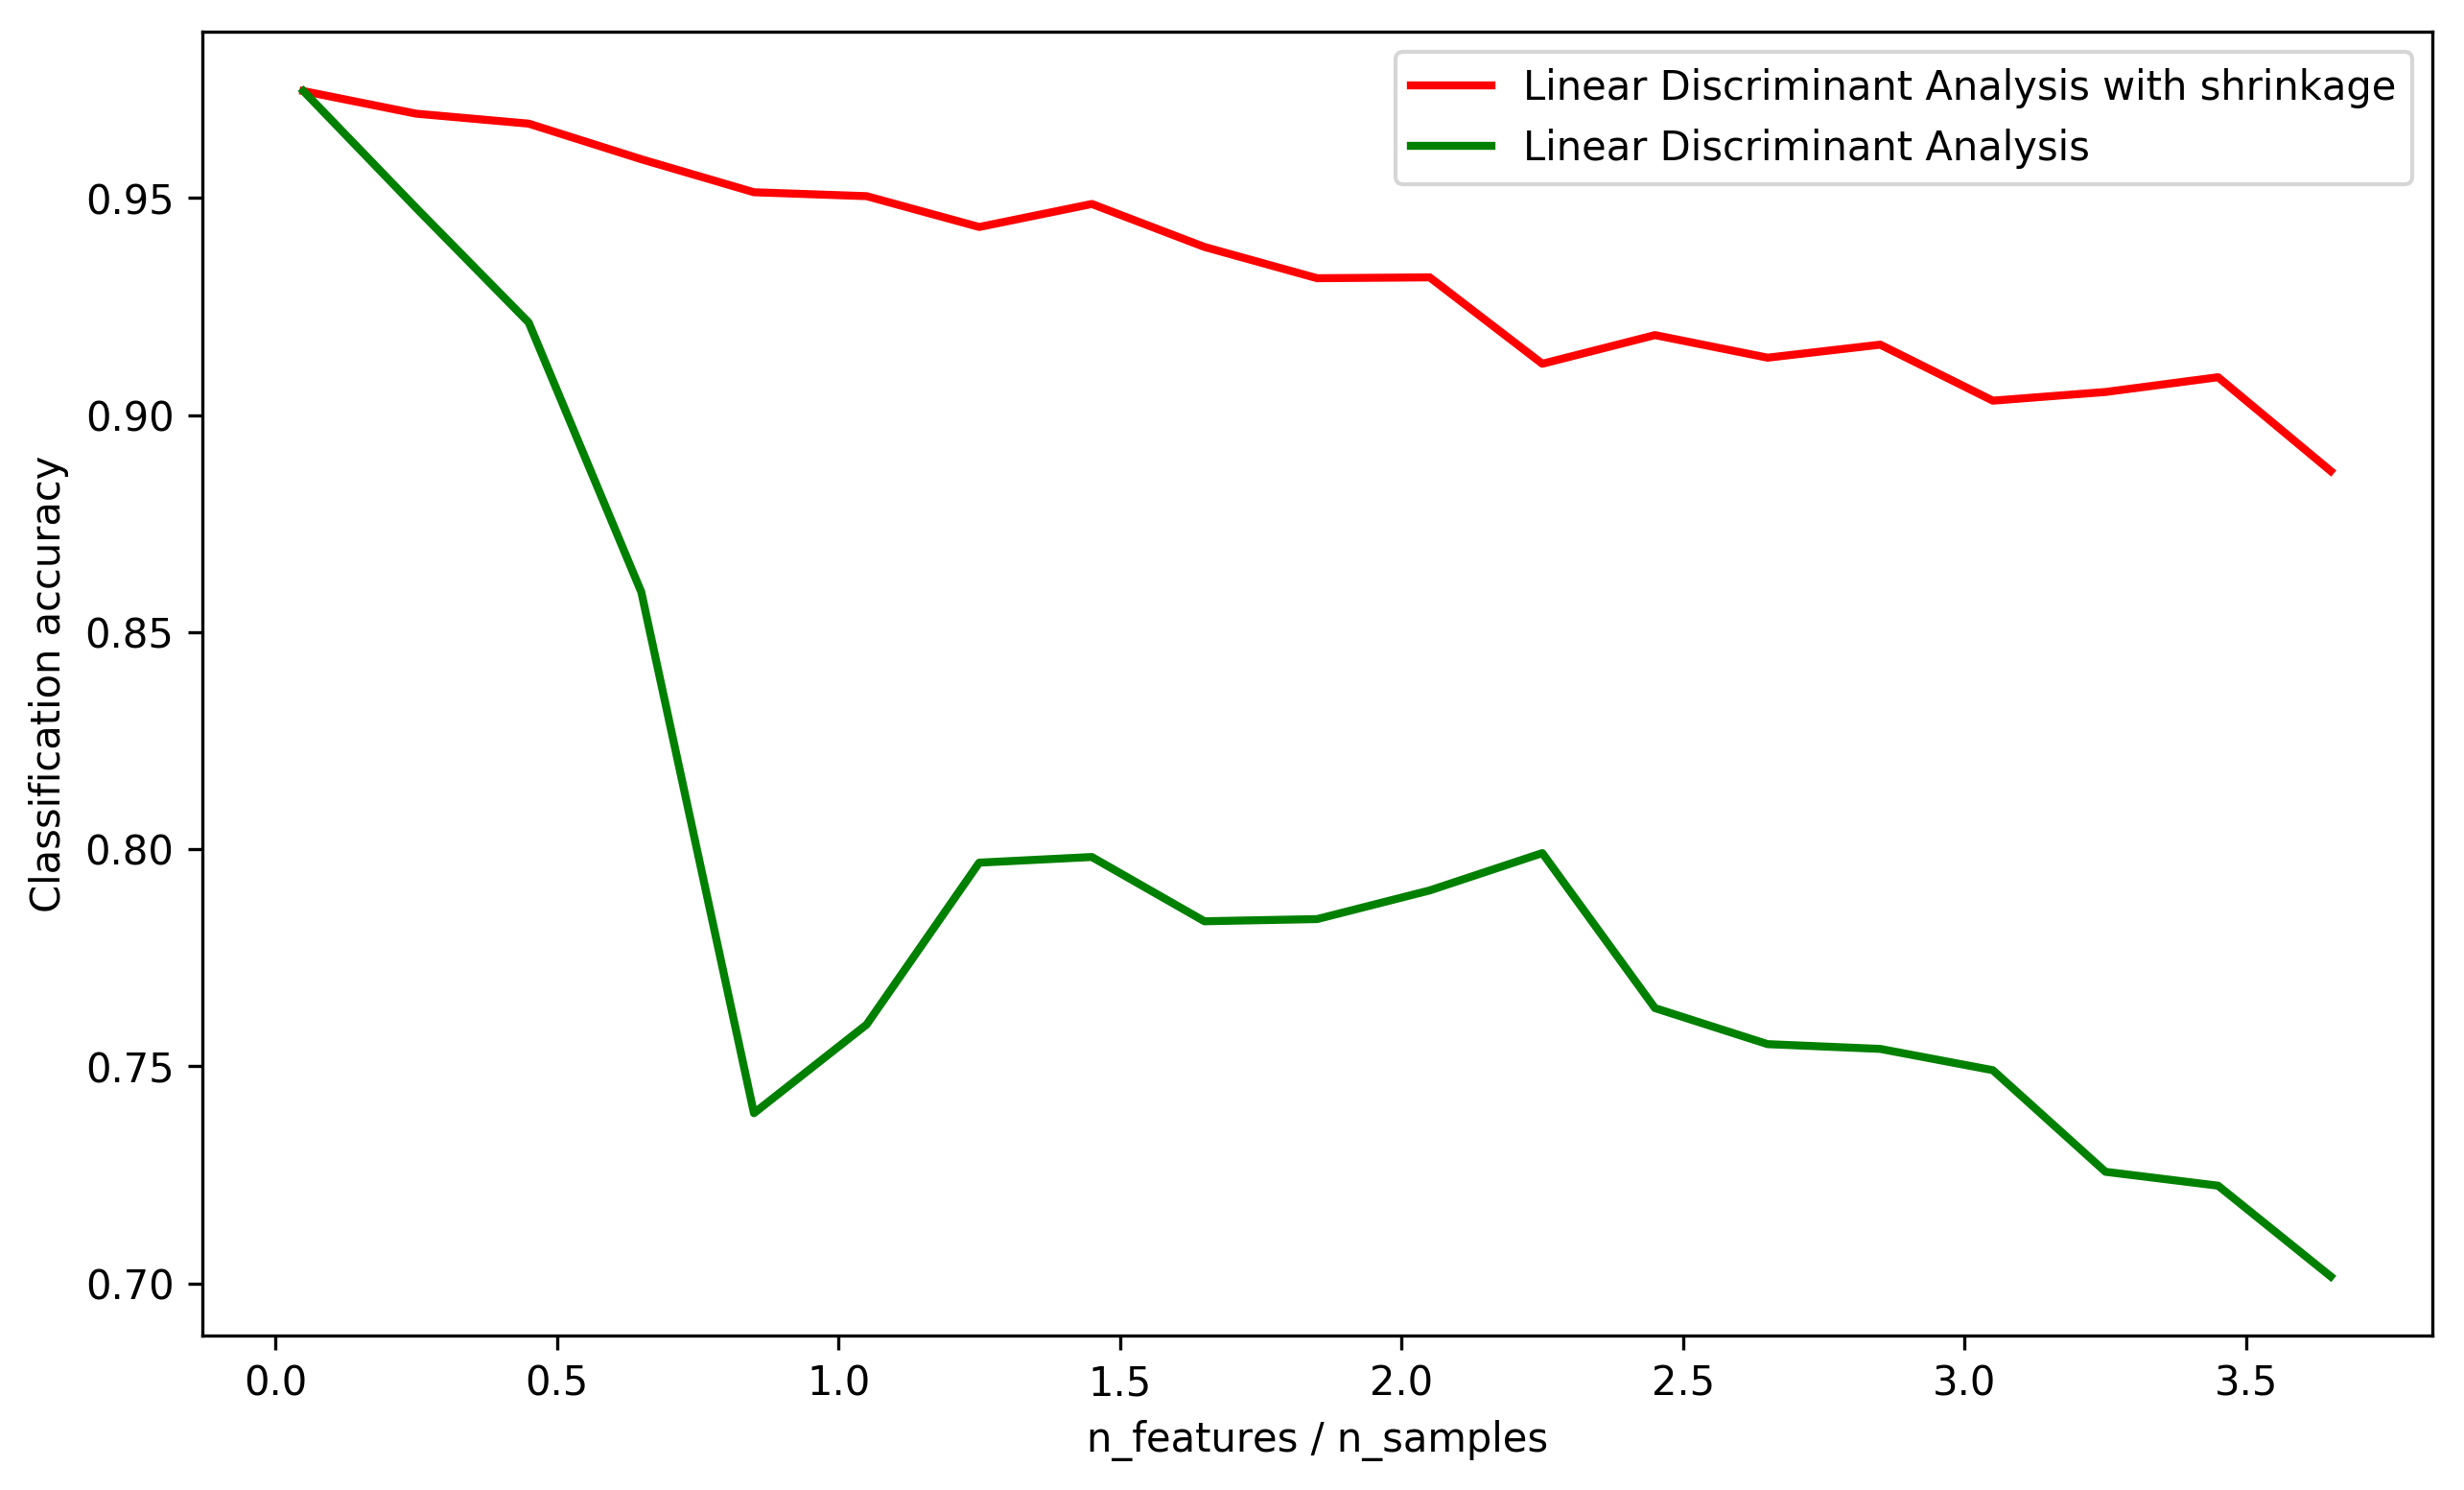

In [22]:
features_samples_ratio = np.array(n_features_range) / n_train
fig = plt.figure(figsize=(10,6), dpi=300)
plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='r')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='g')
plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1, prop={'size': 10})
plt.show()

延伸問題：
1. 所以feature越少越好?